In [1]:
import pandas as pd
FilePath='SaveModel\gabrielStanovsky'
IsTrainMode=1

In [2]:
DataTrain= pd.read_csv(FilePath+"\DataSet\wikiTrain3000.csv", encoding="latin1")
len(DataTrain)


77403

In [3]:
DataTest = pd.read_csv(FilePath+"/DataSet/wikiTest1000.csv", encoding="latin1")
len(DataTest)

29155

In [4]:
import numpy as np

In [5]:
DataTrain=DataTrain.fillna(method="ffill")
DataTest= DataTest.fillna(method="ffill")

In [6]:
DataTrain.tail(1)

,Sentence #,Word,POS,Tag
77402,Sentence:2905,.,POS,O


In [7]:
DataTest.tail(1)

,Sentence #,Word,POS,Tag
29154,Sentence:993,.,POS,O


In [8]:
wordsTrain = list(set(DataTrain["Word"].values))
wordsTrain.append("ENDPAD")
wordsTest = list(set(DataTest["Word"].values))
wordsTest.append("ENDPAD")

In [9]:
n_wordsTrain = len(wordsTrain); n_wordsTrain

7455

In [10]:
n_wordsTest = len(wordsTest); n_wordsTest

3485

In [11]:
tagsTrain = list(set(DataTrain["Tag"].values))
tagsTest =  list(set(DataTest["Tag"].values))


In [12]:
tagsTrain

['O',
 'A1-B',
 'A3-B',
 'P-I',
 'A5-B',
 'A3-I',
 'A2-B',
 'A5-I',
 'A0-I',
 'A1-I',
 'A0-B',
 'A2-I',
 'P-B',
 'A4-I',
 'A4-B']

In [13]:
tagsTest

['O',
 'A1-B',
 'A3-B',
 'P-I',
 'A3-I',
 'A2-B',
 'A1-I',
 'A0-I',
 'A2-I',
 'A0-B',
 'P-B',
 'A4-I',
 'A4-B']

In [14]:
n_tagsTrain = len(tagsTrain); n_tagsTrain
print(n_tagsTrain)

15


In [15]:
n_tagsTest = len(tagsTest); n_tagsTest
print(n_tagsTest)


13


In [16]:
class SentenceGetter(object):
    
    def __init__(self, Data):
        self.n_sent = 1
        self.Data = Data
        self.empty = False
        agg_func = lambda s: [(w, p, t) for w, p, t in zip(s["Word"].values.tolist(),
                                                           s["POS"].values.tolist(),
                                                           s["Tag"].values.tolist())]
        self.grouped = self.Data.groupby("Sentence #").apply(agg_func)
        self.sentences = [s for s in self.grouped]
    
    def get_next(self):
        try:
            s = self.grouped["Sentence: {}".format(self.n_sent)]
            self.n_sent += 1
            return s
        except:
            return None



In [17]:
getterTest = SentenceGetter(DataTest)
getterTrain = SentenceGetter(DataTrain)

In [18]:
len(DataTrain)

77403

In [19]:
sent = getterTrain.get_next()


In [20]:
sentencesTrain = getterTrain.sentences
sentencesTest = getterTest.sentences
len(sentencesTrain)
sentencesTest[0]

[('While', 'POS', 'O'),
 ('pursuing', 'POS', 'P-B'),
 ('his', 'POS', 'A1-B'),
 ('MFA', 'POS', 'A1-I'),
 ('at', 'POS', 'A2-B'),
 ('Columbia', 'POS', 'A2-I'),
 ('in', 'POS', 'A2-I'),
 ('New', 'POS', 'A2-I'),
 ('York', 'POS', 'A2-I'),
 ('York', 'POS', 'O'),
 ('Scieszka', 'POS', 'A0-B'),
 ('painted', 'POS', 'O'),
 ('apartments', 'POS', 'O'),
 ('.', 'POS', 'O')]

In [21]:
len(sentencesTest)

993

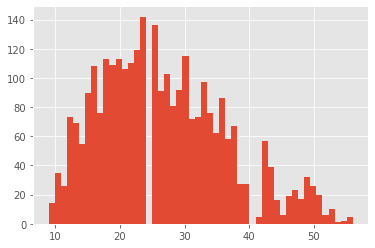

In [22]:
if IsTrainMode==1:
    import matplotlib.pyplot as plt
    plt.style.use("ggplot")
    plt.hist([len(s) for s in sentencesTrain], bins=50)
    plt.show()

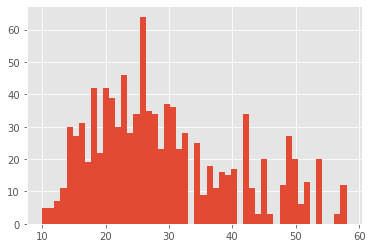

In [23]:
if IsTrainMode==1:
    plt.hist([len(s) for s in sentencesTest], bins=50)
    plt.show()


In [24]:
   max_len = 50
if IsTrainMode==1:
    word2idxTrain = {w: i for i, w in enumerate(wordsTrain)}
    tag2idxTrain = {t: i for i, t in enumerate(tagsTrain)}
    df = pd.DataFrame.from_dict(tag2idxTrain, orient="index")
    df.to_csv(FilePath+"/DataSet/tag2idxTrain.csv")
    df = pd.DataFrame.from_dict(word2idxTrain, orient="index")
    df.to_csv(FilePath+"/DataSet/word2idxTrain.csv")
    print(tag2idxTrain)
else:
    df = pd.read_csv(FilePath+"/DataSet/tag2idxTrain.csv", index_col=0)
    tag2idxTrain = df.to_dict("dict")
    tag2idxTrain=tag2idxTrain["0"]
    #tag2idxTrain = dict(zip(tag2idxTrain[0], tag2idxTrain[1]))
    print(tag2idxTrain)
    df = pd.read_csv(FilePath+"/DataSet/word2idxTrain.csv", index_col=0)
    word2idxTrain = df.to_dict("dict")
    word2idxTrain=word2idxTrain["0"]
    #word2idxTrain = dict(zip(word2idxTrain["index"], word2idxTrain["data"]))
    word2idxTrain
    print("TestMode")

{'O': 0, 'A1-B': 1, 'A3-B': 2, 'P-I': 3, 'A5-B': 4, 'A3-I': 5, 'A2-B': 6, 'A5-I': 7, 'A0-I': 8, 'A1-I': 9, 'A0-B': 10, 'A2-I': 11, 'P-B': 12, 'A4-I': 13, 'A4-B': 14}


In [25]:
tag2idxTrain

{'O': 0,
 'A1-B': 1,
 'A3-B': 2,
 'P-I': 3,
 'A5-B': 4,
 'A3-I': 5,
 'A2-B': 6,
 'A5-I': 7,
 'A0-I': 8,
 'A1-I': 9,
 'A0-B': 10,
 'A2-I': 11,
 'P-B': 12,
 'A4-I': 13,
 'A4-B': 14}

In [26]:
tag2idxTrain

{'O': 0,
 'A1-B': 1,
 'A3-B': 2,
 'P-I': 3,
 'A5-B': 4,
 'A3-I': 5,
 'A2-B': 6,
 'A5-I': 7,
 'A0-I': 8,
 'A1-I': 9,
 'A0-B': 10,
 'A2-I': 11,
 'P-B': 12,
 'A4-I': 13,
 'A4-B': 14}

In [27]:
word2idxTrain['0']

3483

In [28]:
XTrain = [[word2idxTrain[w[0]] for w in s] for s in sentencesTrain]


In [29]:
MYS=1
MYW=1
XTest=[[]]
XTest
for s in sentencesTest:
 XTest.append([])
 #MYW=0
 for w in s:
    if w[0] in word2idxTrain:
     XTest[MYS].append(word2idxTrain[w[0]])
    else:
     XTest[MYS].append(7454)   
     MYW+=1
        
 MYS+= 1
XTest.pop(0)

[]

In [30]:
print(word2idxTrain['destroyed'])

4864


In [31]:
XTest

[[4679,
  7454,
  2337,
  7454,
  5854,
  5957,
  7098,
  2596,
  2041,
  2041,
  7454,
  7454,
  7454,
  2169],
 [1890,
  1804,
  6801,
  4471,
  7454,
  385,
  6757,
  4589,
  3690,
  3690,
  1388,
  6776,
  6152,
  7297,
  2037,
  7454,
  334,
  7454,
  5399,
  7454,
  6636,
  5399,
  7454,
  6636,
  5399,
  3385,
  3385,
  2003,
  6152,
  648,
  5775,
  3690,
  334,
  7454,
  7,
  7454,
  2169],
 [1561,
  7454,
  2676,
  7454,
  3196,
  334,
  4160,
  7454,
  5777,
  5399,
  6046,
  7454,
  6636,
  5399,
  4298,
  334,
  3719,
  4402,
  2169],
 [5220,
  6801,
  2486,
  2632,
  6636,
  5399,
  4487,
  2718,
  2718,
  648,
  7454,
  5399,
  7454,
  6636,
  5399,
  4487,
  7454,
  2123,
  477,
  7454,
  5018,
  1022,
  2169],
 [5220,
  6801,
  2486,
  2632,
  6636,
  5399,
  4487,
  2718,
  2718,
  648,
  7454,
  5399,
  7454,
  6636,
  5399,
  4487,
  7454,
  2123,
  477,
  7454,
  5018,
  1022,
  2169],
 [2166,
  7454,
  7454,
  7454,
  2539,
  2486,
  1652,
  841,
  2564,
  7098,
 

In [32]:
from keras.preprocessing.sequence import pad_sequences
XTrain = pad_sequences(maxlen=max_len, sequences=XTrain, padding="post", value=n_wordsTrain - 1)
XTest = pad_sequences(maxlen=max_len, sequences=XTest, padding="post", value=n_wordsTrain - 1) #******
#XTest[1000]

Using TensorFlow backend.


In [33]:
YTrain = [[tag2idxTrain[w[2]] for w in s] for s in sentencesTrain]
YTrain = pad_sequences(maxlen=max_len, sequences=YTrain, padding="post", value=tag2idxTrain["O"])
from keras.utils import to_categorical
YTrain = [to_categorical(i, num_classes=n_tagsTrain) for i in YTrain]

In [34]:
YTest = [[tag2idxTrain[w[2]] for w in s] for s in sentencesTest]
YTest = pad_sequences(maxlen=max_len, sequences=YTest, padding="post", value=tag2idxTrain["O"])
from keras.utils import to_categorical
YTest = [to_categorical(i, num_classes=n_tagsTrain) for i in YTest]

In [35]:
from keras.models import Model, Input
from keras.layers import LSTM, Embedding, Dense, TimeDistributed, Dropout, Bidirectional
#print(word2idxTrain['obama'])

In [36]:
input = Input(shape=(max_len,))
model = Embedding(input_dim=n_wordsTrain, output_dim=50, input_length=max_len)(input)  # 50-dim embedding
model = Dropout(0.1)(model)
model = Bidirectional(LSTM(units=100, return_sequences=True, recurrent_dropout=0.1))(model)  # variational biLSTM
out = TimeDistributed(Dense(n_tagsTrain, activation="softmax"))(model)  # softmax output layer

In [37]:
model = Model(input, out)

In [38]:
import keras_metrics as km
model.compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics=['accuracy',km.precision(), km.recall()])

tracking <tf.Variable 'Variable:0' shape=() dtype=int32, numpy=0> tp
tracking <tf.Variable 'Variable:0' shape=() dtype=int32, numpy=0> fp
tracking <tf.Variable 'Variable:0' shape=() dtype=int32, numpy=0> tp
tracking <tf.Variable 'Variable:0' shape=() dtype=int32, numpy=0> fn


In [39]:
from tensorflow import keras
import keras_metrics as km
if IsTrainMode==1:
    history = model.fit(XTrain, np.array(YTrain), batch_size=32, epochs=10, validation_split=0.1, verbose=1)
else:
    model = keras.models.load_model(FilePath+'\Model\Model', custom_objects={'binary_precision':km.precision(), 'binary_recall':km.recall()})


C:\Users\hoshyar\anaconda3\envs\tf\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 2614 samples, validate on 291 samples
Epoch 1/10
2614/2614 [==============================] - 6s 2ms/step - loss: 0.9342 - accuracy: 0.7609 - precision: 0.7506 - recall: 0.7596 - val_loss: 0.8080 - val_accuracy: 0.7718 - val_precision: 0.7977 - val_recall: 0.9355
Epoch 2/10
2614/2614 [==============================] - 5s 2ms/step - loss: 0.7695 - accuracy: 0.7708 - precision: 0.8325 - recall: 0.9180 - val_loss: 0.8053 - val_accuracy: 0.7605 - val_precision: 0.9341 - val_recall: 0.7526
Epoch 3/10
2614/2614 [==============================] - 5s 2ms/step - loss: 0.7380 - accuracy: 0.7757 - precision: 0.8737 - recall: 0.9087 - val_loss: 0.8149 - val_accuracy: 0.7487 - val_precision: 0.9158 - val_recall: 0.7923
Epoch 4/10
2614/2614 [==============================] - 5s 2ms/step - loss: 0.7169 - accuracy: 0.7797 - precision: 0.8838 - recall: 0.9067 - val_loss: 0.7846 - val_accuracy: 0.7735 - val_precision: 0.8555 - val_recall: 0.8983
Epoch 5/10
2614/2614 [===========================

In [40]:
if IsTrainMode==1:
    hist = pd.DataFrame(history.history)
    hist['recall']

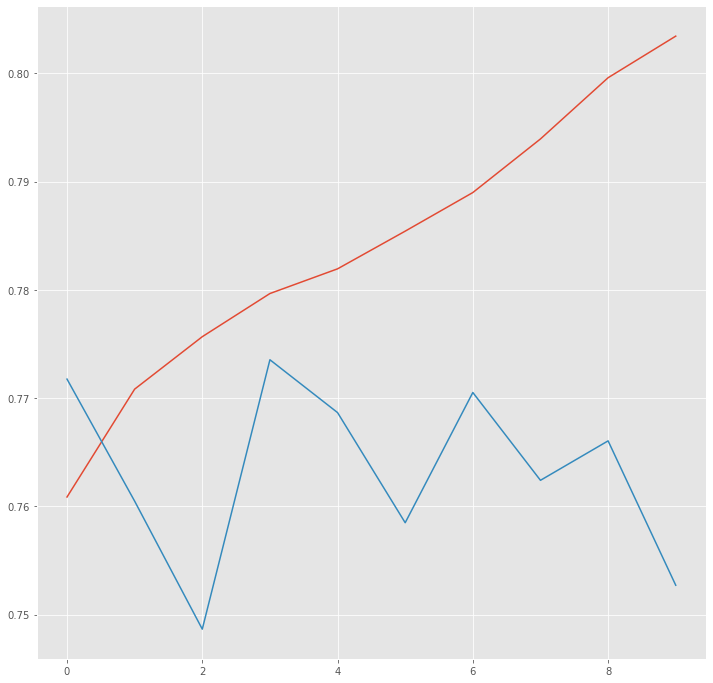

In [41]:
if IsTrainMode==1:
    plt.figure(figsize=(12,12))
    plt.plot(hist["accuracy"])
    plt.plot(hist["val_accuracy"])
    plt.show()


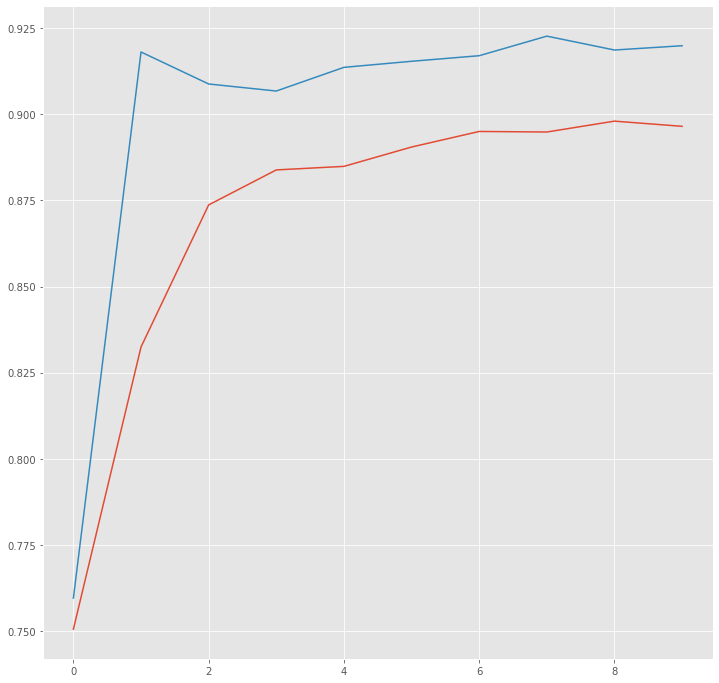

In [42]:
if IsTrainMode==1:
    plt.figure(figsize=(12,12))
    plt.plot(hist["precision"])
    plt.plot(hist["recall"])
    plt.show()


In [43]:
print("Evaluate on test data")
results = model.evaluate(XTest, np.array(YTest), batch_size=32)
print(results)


Evaluate on test data
993/993 [==============================] - 1s 543us/step
[1.2602993447374842, 0.7613494396209717, 0.7990804314613342, 0.9420806765556335]


In [44]:
if IsTrainMode==1:
    precision=results[2]
    recall=results[3]
    print(precision)
    print(recall)
    F1=2*(precision*recall)/(precision+recall)
    print("F1:")
    print(F1)

    from sklearn.metrics import auc
    auc_precision_recall = auc(hist['recall'],hist['precision'])
    print("auc")
    print(auc_precision_recall)

0.7990804314613342
0.9420806765556335
F1:
0.8647083030137671


ValueError: x is neither increasing nor decreasing : [0.75964814 0.91802531 0.90874934 0.90670741 0.9135744  0.91533226
 0.91694891 0.92262733 0.91860062 0.91984361].

In [ ]:
if IsTrainMode==1:
 model.save(FilePath+'/Model/Model')

In [ ]:
from sklearn.metrics import classification_report

y_pred = model.predict(XTest, batch_size=64, verbose=1)
y_pred


In [ ]:
[XTest[0]]

In [ ]:
i = 0
p = model.predict(np.array([XTest[i]]))
p
p = np.argmax(p, axis=-1)
print(p)
print("{:15} ({:5}): {}".format("Word", "True", "Pred"))
for w, pred in zip(XTest[i], p[0]):
    print(tagsTrain[pred])
  #  print("{:15}: {}".format(wordsTest[w], tagsTrain[1]))

In [ ]:
XTest[0]
